In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Support vector machine model - Support Vector Classifier
from sklearn.svm import SVC

# Dataset - Make classifications
from sklearn.datasets import make_classification

In [2]:
# Global variables
separator = "_"*20
divider = "\n" + "*"*90 + "\n"

np.random.seed(42)

# Generate the Datasets
x, y = make_classification(
    n_samples = 100,
    n_features = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    class_sep = 2.0,
    random_state = 42
)

df = pd.DataFrame(x, columns=["Feature_1", "Feature_2"])
df["Target"] = y

# Introduce missing data explicitly
n_missing = 10 # 10% missing
missing_indices = np.random.choice(df.index, n_missing, replace=False)

df.loc[missing_indices, "Feature_1"] = np.nan

print(f"{separator} Dataset with the missing values in Feature_1: {separator}\n{df.loc[missing_indices]}")

print(f"{divider}\n{separator} Count of the missing values per column: {separator}\n{df.isnull().sum()}")

____________________ Dataset with the missing values in Feature_1: ____________________
    Feature_1  Feature_2  Target
83        NaN  -1.359041       0
53        NaN  -2.154699       0
70        NaN   1.656893       1
45        NaN   0.363953       1
44        NaN  -1.764086       0
39        NaN  -1.405301       0
22        NaN  -1.366994       0
80        NaN   1.692033       1
10        NaN  -2.233955       0
0         NaN  -1.757178       0

******************************************************************************************

____________________ Count of the missing values per column: ____________________
Feature_1    10
Feature_2     0
Target        0
dtype: int64


In [3]:
# Treating Missing data in Feature_1
df["Feature_1"] = df["Feature_1"].fillna(df["Feature_1"].mean())
print(f"{separator} After Treating the missing values per column: {separator}\n{df.isnull().sum()}")

____________________ After Treating the missing values per column: ____________________
Feature_1    0
Feature_2    0
Target       0
dtype: int64


In [4]:
# Splitting the data - Training and testing set
x = df[["Feature_1", "Feature_2"]]
y = df["Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [5]:
# Creating the model and fit it using SVC and kernel
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(x_train, y_train)

# Predicting the model
y_pred = svm_model.predict(x_test)

In [6]:
# Evaluate using accuracy_score, confusion_matrix and classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\n=> The accuracy: {accuracy}")
print(f"{divider}\n=> The Confusion Matrix:\n{conf_mat}")
print(f"{divider}\n=> The Classification Report:\n{report}")


=> The accuracy: 1.0

******************************************************************************************

=> The Confusion Matrix:
[[18  0]
 [ 0 15]]

******************************************************************************************

=> The Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



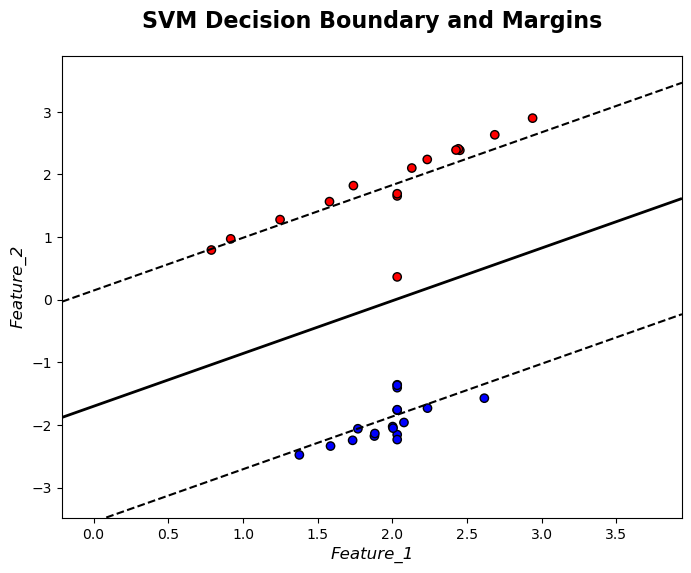

In [7]:
# Plotting Scatter and Plot
plt.figure(figsize=(8, 6))

# Scatter plot of test points colored by class
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test , cmap='bwr', edgecolors = 'k')
plt.scatter(x_test["Feature_1"], x_test["Feature_2"], c=y_test , cmap="bwr", edgecolors = 'k')

# Define grid boundaries based on test data
# x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
x_min, x_max = x_test["Feature_1"].min() - 1, x_test["Feature_1"].max() + 1
# y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
y_min, y_max = x_test["Feature_2"].min() - 1, x_test["Feature_2"].max() + 1

xx , yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))

# Compute the decision function on the grid
# Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=x_train.columns)

Z = svm_model.decision_function(grid_df).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels = [0], colors = 'k', linewidths = 2) # Hyperplane
plt.contour(xx, yy, Z, levels = [-1, 1], colors = 'k', linestyles = "--") #  Margins (hard and soft margins)

plt.title("SVM Decision Boundary and Margins", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Feature_1", fontsize=12, fontstyle="italic")
plt.ylabel("Feature_2", fontsize=12, fontstyle="italic")
plt.show()